In [160]:
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


df=pd.read_csv('train.csv')
df=df[df['Country_Region']=="India"]
# define input sequence
#raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

data_to_use = df['ConfirmedCases'].values
data_to_use_f = df['Fatalities'].values
print('Total number of days in the dataset: {}'.format(len(data_to_use)))

#normalising the dataset
scaler = StandardScaler()
dataset = scaler.fit_transform(data_to_use.reshape(-1, 1))
scaled_dataset_f = scaler.fit_transform(data_to_use_f.reshape(-1, 1))

def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y


X, y = window_data(scaled_dataset, 7)
X_f, y_f = window_data(scaled_dataset_f, 7)

X_train  = np.array(X[:60])
y_train = np.array(y[:60])

X_test = np.array(X[60:])
y_test = np.array(y[60:])


X_train_f  = np.array(X_f[:60])
y_train_f = np.array(y_f[:60])

X_test_f = np.array(X_f[60:])
y_test_f = np.array(y_f[60:])

print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

dates = df["Date"]
train_date = dates[:60]
test_date = dates[-10:]



# choose a number of time steps
n_steps = 7
# split into samples
#X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]




Total number of days in the dataset: 77
X_train size: (60, 7, 1)
y_train size: (60, 1)
X_test size: (10, 7, 1)
y_test size: (10, 1)


In [161]:
##learning for confirmedcases

X = X_train
y = y_train

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=5000, verbose=0)

[0.6901678442955017, 0.7576096653938293, 0.9316493272781372, 1.1502153873443604, 1.5273935794830322, 2.136042356491089, 2.4283909797668457, 2.7567381858825684, 3.3740811347961426, 4.2816290855407715]
[[0.55656897]
 [0.77448149]
 [0.91463669]
 [1.49157691]
 [2.01475897]
 [2.03779818]
 [2.53218122]
 [3.01792457]
 [4.16028539]
 [4.67194785]]


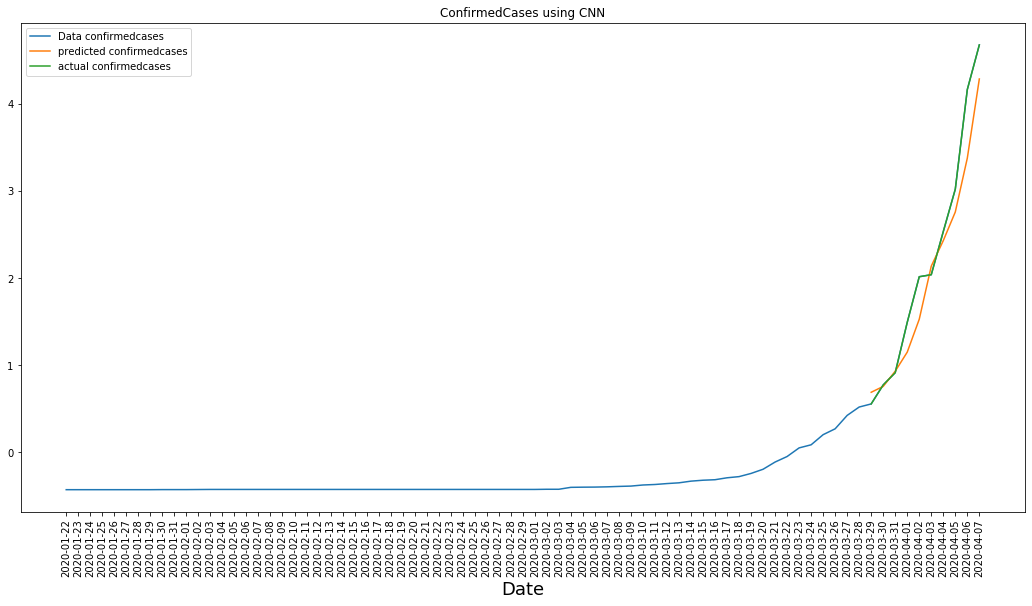

In [162]:
# demonstrate prediction
import math
y_pred=[]
for i in X_test:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]
    
print(y_pred)
print(y_test)

plt.figure(figsize = (18,9))
# plt.plot(train_date,train_confirmed,label="Testing Data")
# plt.plot(test_date,pred_conf_cases,label="Predicted Data")
plt.plot(dates,scaled_dataset,label="Data confirmedcases")
plt.plot(test_date,y_pred,label="predicted confirmedcases")
plt.plot(test_date,y_test,label="actual confirmedcases")
# plt.plot(train_date,X_train,label="training data")
# plt.plot(train_date,X_test,label="testing data")
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=18)
plt.legend()
plt.title("ConfirmedCases using CNN")
plt.show()

In [163]:
##learning for fatalities
X = X_train_f
y = y_train_f

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)
# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=5000, verbose=0)

(60, 7, 1)


[0.7997498512268066, 0.7479602694511414, 1.052535891532898, 1.392441987991333, 1.7449661493301392, 1.8026283979415894, 3.0650947093963623, 3.8704280853271484, 3.975616931915283, 5.245240211486816]


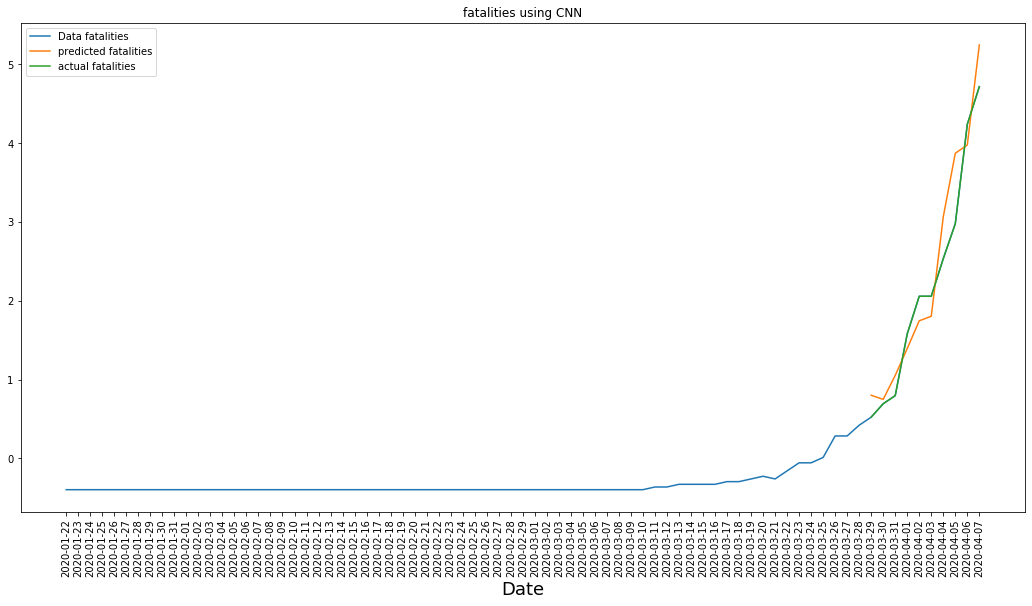

In [167]:
# demonstrate prediction
import math
y_pred_f=[]
for i in X_test_f:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred_f.append(((float(yhat[0]))))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]
    
print(y_pred_f)
# tmp=[]
# for _ in y_test_f:
#     tmp.append(_[0])
    

# print(tmp)

plt.figure(figsize = (18,9))
# plt.plot(train_date,train_confirmed,label="Testing Data")
# plt.plot(test_date,pred_conf_cases,label="Predicted Data")
plt.plot(dates,scaled_dataset_f,label="Data fatalities")
plt.plot(test_date,y_pred_f,label="predicted fatalities")
plt.plot(test_date,y_test_f,label="actual fatalities")
# plt.plot(train_date,X_train,label="training data")
# plt.plot(train_date,X_test,label="testing data")
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=18)
plt.legend()
plt.title("fatalities using CNN")
plt.show()

In [165]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_37 (Conv1D)           (None, 6, 32)             96        
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 3, 32)             0         
_________________________________________________________________
flatten_38 (Flatten)         (None, 96)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 50)                4850      
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 51        
Total params: 4,997
Trainable params: 4,997
Non-trainable params: 0
_________________________________________________________________
